1. Connect to RDBMS to get dataset
2. Clean data to analysis
3. Analysis of reviews in recent years
4. Find out what caused those reviews with keywords

#                                                  MY REPORT ON BRITIST AIRWAYS WITH PYTHON

                                                        # Connect to RDBMS to get dataset
                                            - Connect with MySQL
                                            - Separate dataset into 2 types

In [9]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
class connectDatabase:
    def __init__(self,mysql_host_name,mysql_user_name,mysql_password,mysql_database_name):
        self.host_name = mysql_host_name
        self.user_name = mysql_user_name
        self.password = mysql_password
        self.database = mysql_database_name
        self.data = []
        self.connect_database()
    def connect_database(self):
        self.conn = mysql.connector.connect(
            host=self.host_name,
            user=self.user_name,
            password=self.password,
            database=self.database
        )
        self.curr = self.conn.cursor()
    def getData(self,mysql_table_name): 
        self.curr.execute(f"SELECT * FROM {mysql_table_name}")
        data = self.curr.fetchall()
        for row in data:
            self.data.append(row)
        return self.data

In [11]:
mysql_host_name = "localhost"
mysql_database_name = "britist_airport"
mysql_user_name = "root"
mysql_password = '*******'
mysql_table = 'fact_table'
connect = connectDatabase(mysql_host_name,mysql_user_name,mysql_password,mysql_database_name)
data = connect.getData(mysql_table)

In [12]:
columns = ['id_header', 'id_name', 'country', 'verify', 
                                       'rating', 'day_flight', 'month_flight', 'year_flight', 
                                       'Type_Travel', 'seat_Type','place_from', 'place_to', 'comment_id']
df = pd.DataFrame(data,columns=columns)
df = df.reset_index(drop=False) 
df.head()

,index,id_header,id_name,country,verify,rating,day_flight,month_flight,year_flight,Type_Travel,seat_Type,place_from,place_to,comment_id
0,0,0,0,Italy,Not Verified,3,3,7,2023,Couple Leisure,Economy Class,London Heathrow,Naples,0
1,1,1,1,Senegal,Trip Verified,10,2,7,2023,Solo Leisure,Economy Class,Berlin,London,1
2,2,2,2,United States,Trip Verified,1,30,6,2023,Family Leisure,Economy Class,Glasgow,London,2
3,3,3,3,United Arab Emirates,Trip Verified,1,29,6,2023,Solo Leisure,Economy Class,Dubai,Keflavik via London,3
4,4,4,4,United Kingdom,Not Verified,2,29,6,2023,Couple Leisure,Economy Class,Cairo,London,4


- Data 2 two type verify : Trip Verified and Not Verified 
1. Trip Verified : Editorial staff have inspected a copy of an e-ticket, booking details or a boarding pass, with the customer name confirming the trip written about in the review. We rely upon user’s honesty in providing this information
2. Trip Not Verified : The  Unverified review  shown for comments posted where the user has been unable to, or does not wish to Verify their review (as explained above). The comments have been subjected to the usual manual checks by Editorial staff, but the review authenticity cannot be verified.

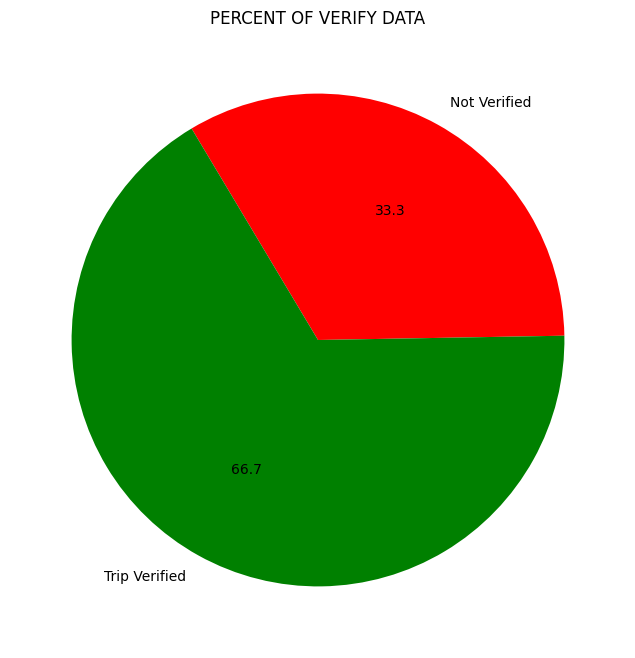

In [13]:
percent_verify_data = df.groupby("verify").count()['index']
fig, ax = plt.subplots(figsize = (16,8))
plt.pie(percent_verify_data.values,labels = percent_verify_data.index,
        colors = ['red','green'],
       autopct = '%1.1f',
       startangle = 1)
plt.title("PERCENT OF VERIFY DATA");

                                                                    # TRIP VERIFY DATA AND CLEAN DATASET
1. How many ratings for each type of score and customer satisfaction
2. Review good and not good feedback year by year

In [14]:
verify_data = df[df['verify'] == 'Trip Verified']
verify_data = verify_data[verify_data['year_flight'] > 2015] # Filter > 2015 because it's have 1 records in dataset
verify_data['status'] = verify_data['rating'].apply(lambda x : "Good" if x >=5 else "Not Good")
verify_data.head()

,index,id_header,id_name,country,verify,rating,day_flight,month_flight,year_flight,Type_Travel,seat_Type,place_from,place_to,comment_id,status
1,1,1,1,Senegal,Trip Verified,10,2,7,2023,Solo Leisure,Economy Class,Berlin,London,1,Good
2,2,2,2,United States,Trip Verified,1,30,6,2023,Family Leisure,Economy Class,Glasgow,London,2,Not Good
3,3,3,3,United Arab Emirates,Trip Verified,1,29,6,2023,Solo Leisure,Economy Class,Dubai,Keflavik via London,3,Not Good
5,5,5,5,United Kingdom,Trip Verified,1,27,6,2023,Solo Leisure,Economy Class,London,Madrid,5,Not Good
6,6,6,6,United States,Trip Verified,1,27,6,2023,Family Leisure,Economy Class,London,Cairo,6,Not Good


                                                        # ANALYSIS OF REVIEW IN RECENT YEARS
                                            1. How many reviews on 2 status ?
                                            2. How many reviews by type travel ?
                                            3. How many reviews by Seat Type ?

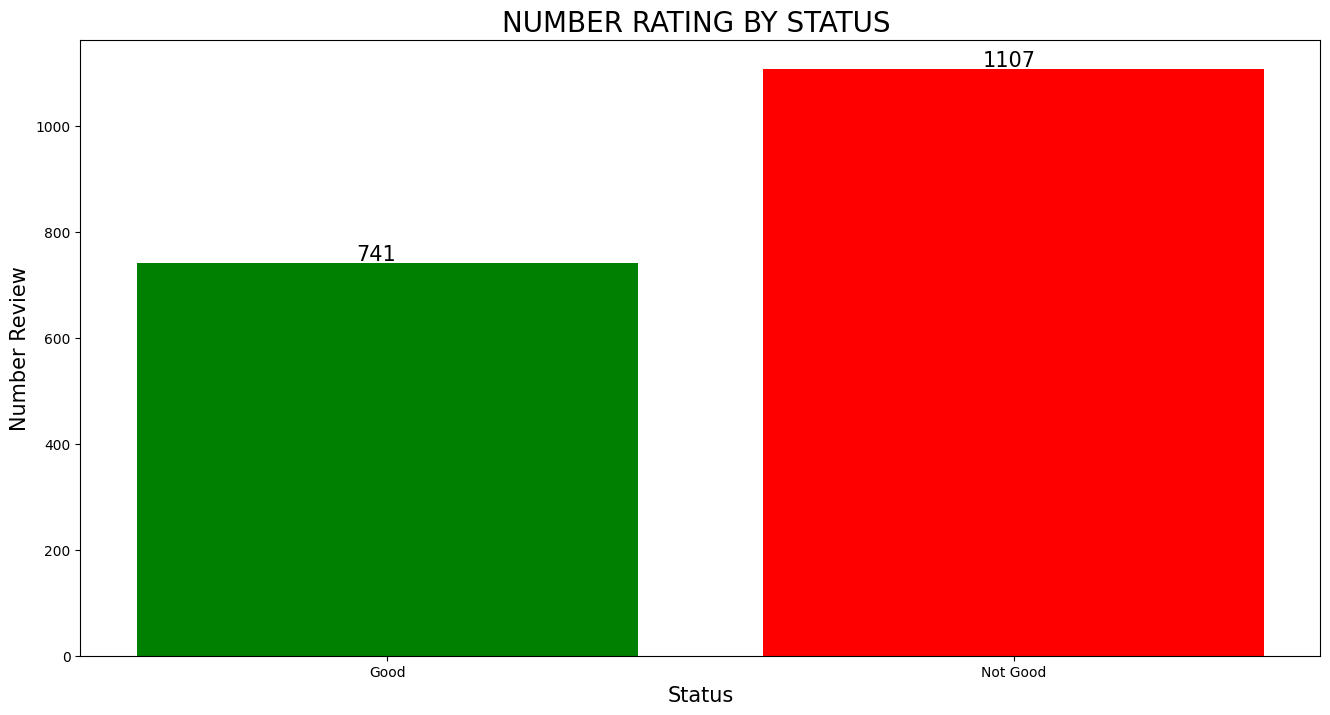

In [15]:
sactifaction_data = verify_data[['index','rating','status']]
sactifaction = sactifaction_data.groupby("status").count()['index']
fig , ax  = plt.subplots(figsize =(16,8))
plt.bar(x = sactifaction.index, height = sactifaction.values,color = ['green','red'],)
plt.ylabel("Number Review",fontsize = 15)
plt.xlabel("Status",fontsize = 15)
plt.title("NUMBER RATING BY STATUS ",fontsize = 20)
for i in range(0,len(sactifaction.values)):
    plt.text(x = i - 0.05 ,
             y = sactifaction.values[i] + 5,
             s = sactifaction.values[i],
            size = 15);

In [16]:
review_by_year = verify_data[['index','rating','month_flight','year_flight','status']]
good_review_by_year = review_by_year[review_by_year['status'] == 'Good'].groupby(['year_flight'])\
    .agg({'index' : 'count'})
bad_review_by_year = review_by_year[review_by_year['status'] == 'Not Good'].groupby(['year_flight'])\
    .agg({'index' : 'count'})
total_review_by_year = review_by_year.groupby('year_flight').count()['rating']

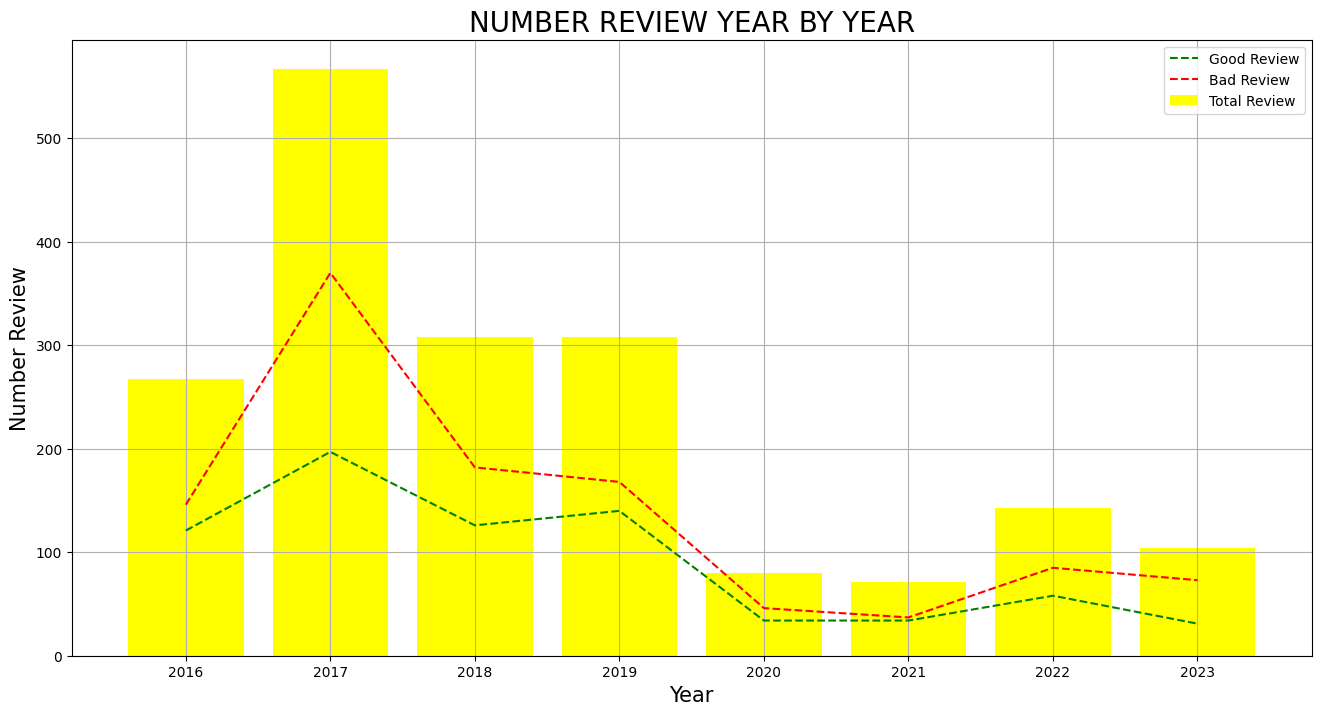

In [17]:
fig ,ax = plt.subplots(figsize = (16,8))
plt.grid()
plt.bar(x = total_review_by_year.index, height = total_review_by_year.values,color = 'yellow',label = 'Total Review')
plt.plot(good_review_by_year.index,'index',data = good_review_by_year,color = 'green',linestyle  = '--',label = 'Good Review')
plt.plot(bad_review_by_year.index,'index',data = bad_review_by_year,color = 'red',linestyle = '--',label = 'Bad Review')
plt.ylabel("Number Review",fontsize = 15)
plt.xlabel("Year",fontsize = 15)
plt.title("NUMBER REVIEW YEAR BY YEAR",fontsize = 20)
plt.legend();

# NUMBER REVIEW BY TYPE TRAVEL YEAR BY YEAR

In [18]:
number_type_travel = verify_data[['index','year_flight','Type_Travel','status']]
number_type_travel = number_type_travel.groupby(["year_flight","Type_Travel",'status']).agg({'index': 'count'})
number_type_travel = number_type_travel.pivot_table(values = 'index', 
                                                    index = ['year_flight','status'],
                                                    columns = ['Type_Travel'])
number_type_travel = number_type_travel.reset_index(drop = False)
number_type_travel.index = number_type_travel.year_flight
number_type_travel

Type_Travel,year_flight,status,Business,Couple Leisure,Family Leisure,Solo Leisure
year_flight,,,,,,
2016,2016,Good,28,34,11,48
2016,2016,Not Good,35,48,22,41
2017,2017,Good,30,72,27,68
2017,2017,Not Good,126,117,40,87
2018,2018,Good,20,33,15,58
2018,2018,Not Good,52,55,21,54
2019,2019,Good,25,47,29,39
2019,2019,Not Good,47,56,16,49
2020,2020,Good,3,8,3,20


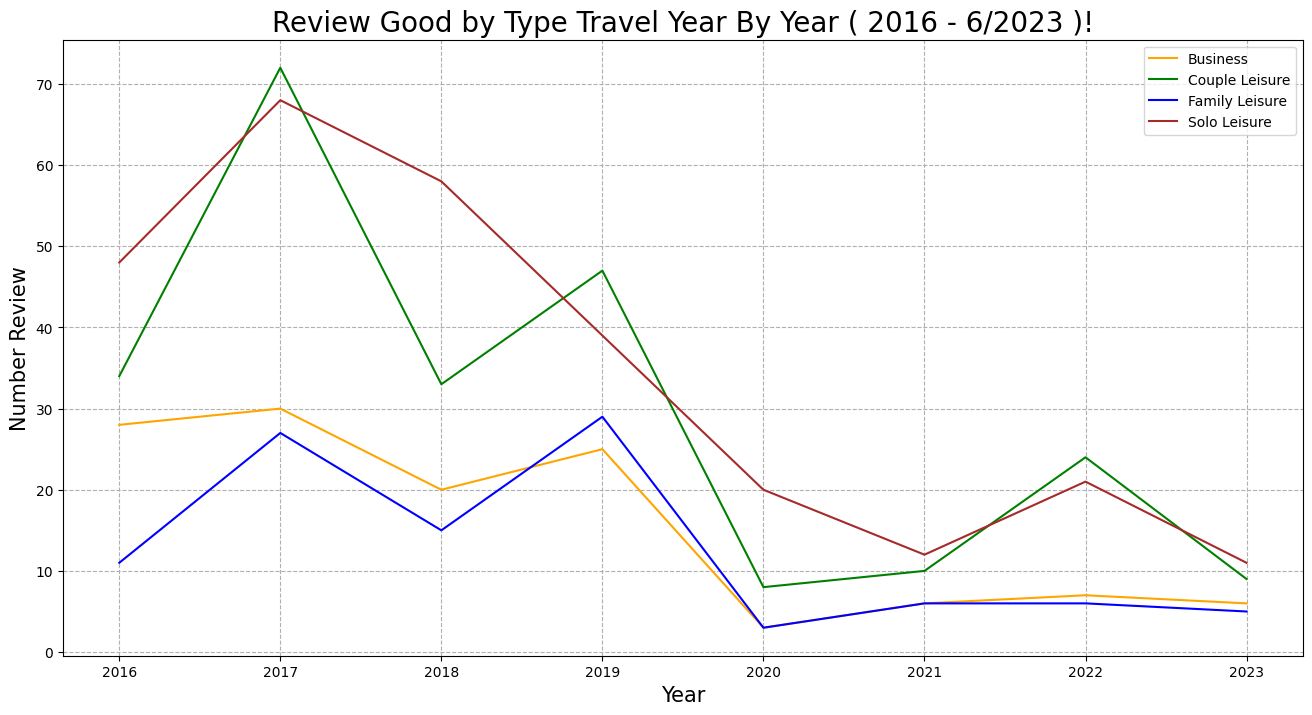

In [19]:
status = ['Good','Not Good']
your_choose = int(input("Input your choice ( 0 or 1 ): "))
type_travel = number_type_travel[number_type_travel['status'] == status[your_choose]]
fig , ax = plt.subplots(figsize = (16,8))
plt.plot(type_travel.index,'Business',data = type_travel,label = 'Business',color = 'orange')
plt.plot(type_travel.index , 'Couple Leisure',data = type_travel,label = 'Couple Leisure',color = 'green')
plt.plot(type_travel.index , 'Family Leisure',data = type_travel,label ='Family Leisure',color = 'blue')
plt.plot(type_travel.index , 'Solo Leisure',data = type_travel,label = 'Solo Leisure',color = 'brown')
plt.title(f"Review {status[your_choose]} by Type Travel Year By Year ( 2016 - 6/2023 )!",fontsize=20)
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Number Review",fontsize = 15)
plt.grid(linestyle = '--')
plt.legend();

# NUMBER REVIEW BY SEAT TYPE YEAR BY YEAR

In [20]:
number_seat_Type = verify_data[['index','year_flight','seat_Type','status']]
number_seat_Type = number_seat_Type.groupby(["year_flight","seat_Type",'status']).agg({'index': 'count'})
number_seat_Type = number_seat_Type.pivot_table(values = 'index', index = ['year_flight','status'],columns = ['seat_Type'])
number_seat_Type = number_seat_Type.reset_index(drop = False)
number_seat_Type.index = number_seat_Type.year_flight

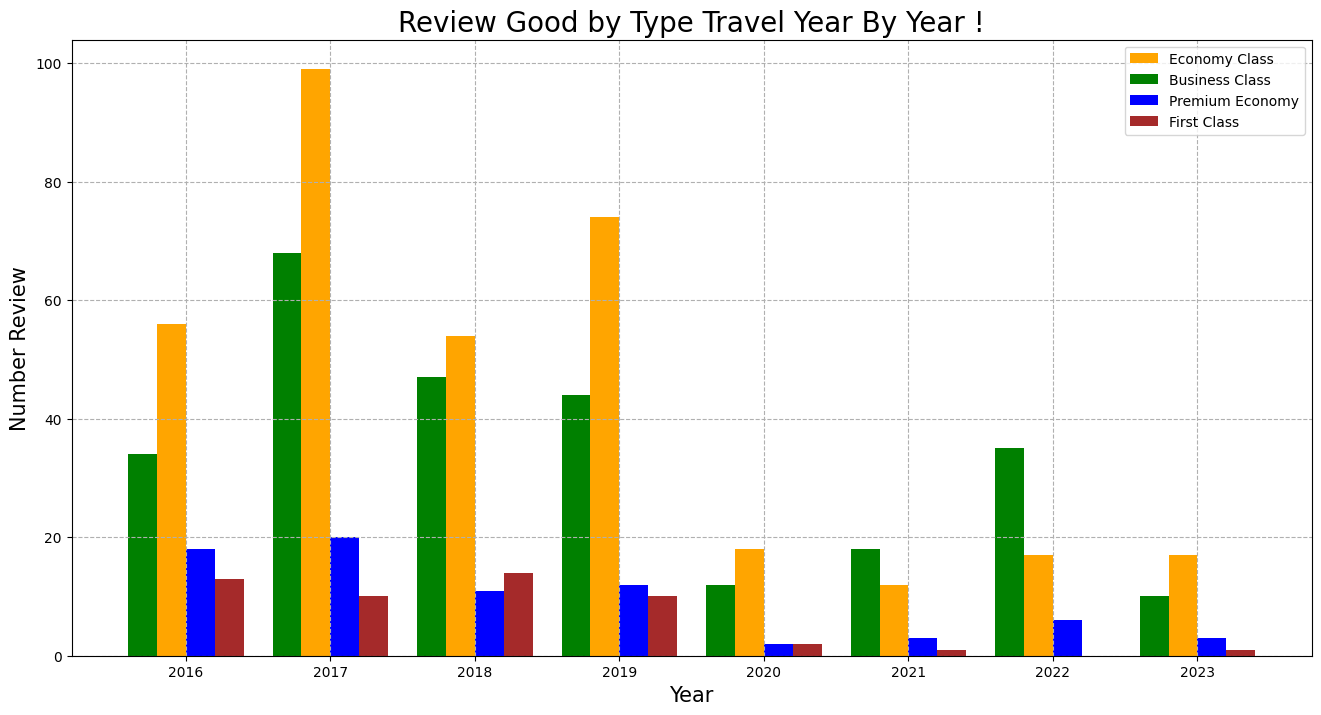

In [21]:
your_choose = int(input("Input your choose ( 0 or 1 ): "))
seat_Type = number_seat_Type[number_seat_Type['status'] == status[your_choose]]
fig , ax = plt.subplots(figsize = (16,8))
plt.bar(x = seat_Type.index - 0.1, height =  seat_Type['Economy Class'].values,width = 0.2,label = 'Economy Class',color = 'orange')
plt.bar(x = seat_Type.index - 0.3, height =  seat_Type['Business Class'].values,width = 0.2,label = 'Business Class',color = 'green')
plt.bar(x = seat_Type.index + 0.1, height =  seat_Type['Premium Economy'].values,width = 0.2,label ='Premium Economy',color = 'blue')
plt.bar(x = seat_Type.index + 0.3, height =  seat_Type['First Class'].values,width = 0.2,label = 'First Class',color = 'brown')
plt.title(f"Review {status[your_choose]} by Type Travel Year By Year !",fontsize=20)
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Number Review",fontsize = 15)
plt.grid(linestyle = '--')
plt.legend();

                                                # Find out what caused those reviews with keywords

In [23]:
import os
path = 'D:\My_project\Airport_Project_Batch_Processing\word'
link = os.listdir(path)
list_path = []
for file in link:
    print(file)
    new_path = path + "\\" + file
    list_path.append(new_path)
print(list_path)

nums_word_beverage_comment.csv
nums_word_food_comment.csv
nums_word_seat_comment.csv
nums_word_service_comment.csv
nums_word_staff_comment.csv
['D:\\My_project\\Airport_Project_Batch_Processing\\word\\nums_word_beverage_comment.csv', 'D:\\My_project\\Airport_Project_Batch_Processing\\word\\nums_word_food_comment.csv', 'D:\\My_project\\Airport_Project_Batch_Processing\\word\\nums_word_seat_comment.csv', 'D:\\My_project\\Airport_Project_Batch_Processing\\word\\nums_word_service_comment.csv', 'D:\\My_project\\Airport_Project_Batch_Processing\\word\\nums_word_staff_comment.csv']


In [24]:
total_comment = len(verify_data)
keywords = dict()
for x in list_path:
    word_df = pd.read_csv(x)
    num_key_word = word_df[word_df['Word'] != str(0)]
    total_num_kw = sum(num_key_word['Number']) 
    percent = total_num_kw / total_comment
    word = x.split("\\")[-1].split(".")[0].split("_")[2]
    keywords[word] = [round(percent*100,2),total_num_kw]

In [25]:
print("TOTAL SURVEY COMMENT :",total_comment)
for key,value in keywords.items():
    print(f"The frequency of keywords '{key}' appering in comment verify data is {value[0]}% and {value[1]} appering")

TOTAL SURVEY COMMENT : 1848
The frequency of keywords 'beverage' appering in comment verify data is 1.3% and 24 appering
The frequency of keywords 'food' appering in comment verify data is 22.08% and 408 appering
The frequency of keywords 'seat' appering in comment verify data is 38.53% and 712 appering
The frequency of keywords 'service' appering in comment verify data is 33.33% and 616 appering
The frequency of keywords 'staff' appering in comment verify data is 19.26% and 356 appering


-- With 37.99% and 32.9% , it can be seen that bad reviews often appear about seating and service issues. Therefore, there should be improvements in these two aspects, especially the seats.